In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
import matplotlib.pyplot as plt

In [3]:
features = asarray([i for i in range(-50,51)])
target = asarray([i**2.0 for i in features])

In [4]:
print(features.min(), features.max(), target.min(), target.max())

-50 50 0.0 2500.0


In [5]:
features = features.reshape((len(features), 1))
target = target.reshape((len(target), 1))

In [6]:
scale_x = MinMaxScaler()
features = scale_x.fit_transform(features)
scale_y = MinMaxScaler()
target = scale_y.fit_transform(target)
print(features.min(), features.max(), target.min(), target.max())

0.0 1.0 0.0 1.0


In [7]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [8]:
model.compile(loss='mse', optimizer='adam')

In [10]:
model.fit(features, target, epochs=500, batch_size=10, verbose=0)

In [11]:
pred = model.predict(features)

In [13]:
features_plot = scale_x.inverse_transform(features)
target_plot = scale_y.inverse_transform(target)
pred_plot = scale_y.inverse_transform(pred)

In [14]:
print('MSE: %.3f' % mean_squared_error(target_plot, pred_plot))

MSE: 1056.542


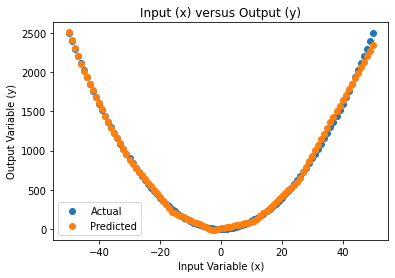

In [15]:
plt.scatter(features_plot,target_plot, label='Actual')
# plot x vs yhat
plt.scatter(features_plot,pred_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()